# 91APP member 資料視覺化

In [1]:
#匯入函式庫
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import pandas as pd
import numpy as np


In [2]:
#讀取資料
ecoupon = pd.read_csv("./Dataset/ECoupon.csv", dtype="unicode")
ecoupon.head()


,ECouponId,ECouponTypeDef,ECouponStartDateTime,ECouponEndDateTime,ECouponUsingStartDateTime,ECouponUsingEndDateTime,ECouponDiscountPrice,ECouponMaxDiscountLimit
0,3046,DrawOut,2015-05-16 00:00:00,2015-05-17 23:59:00,2015-05-16 00:00:00,2015-05-17 23:59:00,50.0,0.3
1,3086,OpenCard,2015-05-20 15:00:00,2015-06-03 23:59:00,2015-05-20 15:00:00,2015-06-03 23:59:00,50.0,0.3
2,3111,DrawOut,2015-05-23 00:00:00,2015-05-24 23:59:00,2015-05-23 00:00:00,2015-05-24 23:59:00,50.0,0.3
3,3225,DrawOut,2015-05-30 00:00:00,2015-05-31 23:59:00,2015-05-30 00:00:00,2015-05-31 23:59:00,50.0,0.3
4,3280,OpenCard,2015-06-04 00:00:00,2015-06-17 00:00:00,2015-06-04 00:00:00,2015-06-17 00:00:00,50.0,0.3


In [3]:
member = pd.read_csv("./Dataset/Member.csv", dtype="unicode")
member.head()


,MemberId,Birthday,GenderTypeDef,RegisterSourceTypeDef,RegisterDateTime,MinOrderDate,OpenCardPresent,LastBirthdayPresentYear,IsInBlackList
0,1587633,NaN,NaN,Web,2016-08-05 19:45:59.670,NaN,0,0,NaN
1,1587634,NaN,NaN,Web,2016-10-27 21:25:22.907,NaN,0,0,NaN
2,1587658,NaN,NaN,Web,2015-08-11 19:11:09.030,NaN,0,0,NaN
3,1587809,NaN,NaN,Web,2015-08-11 19:53:32.397,NaN,0,0,NaN
4,1587830,NaN,NaN,Web,2017-06-03 17:33:03.987,NaN,0,0,NaN


In [4]:
order = pd.read_csv("./Dataset/Orders.csv", dtype="unicode")
order.head()


,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,SalesOrderReceiverId,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,1480890,嘉義縣,水上鄉,608,中庄門市,910828,SevenEleven,Finish,NaN,NaN
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,1480890,嘉義縣,水上鄉,608,中庄門市,910828,SevenEleven,Finish,NaN,NaN
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,1480890,嘉義縣,水上鄉,608,中庄門市,910828,SevenEleven,Finish,NaN,NaN
3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,True,False,...,1480890,嘉義縣,水上鄉,608,中庄門市,910828,SevenEleven,Finish,NaN,NaN
4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,True,False,...,1480896,桃園市,中壢區,320,復華門市,114071,SevenEleven,Finish,NaN,NaN


In [5]:
promotion_condition = pd.read_csv("./Dataset/PromotionConditions.csv", dtype="unicode")
promotion_condition.head()


,PromotionId,PromotionStartDateTime,PromotionEndDateTime,PromotionValidFlag,PromotionCondition_TotalPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalQty,PromotionCondition_DiscountPrice,DiscountType
0,3,2015-06-02 16:00:00.000,2015-07-10 13:00:00.000,True,0.0,0.0,2,398.0,任選優惠價
1,4,2015-06-02 17:00:00.000,2015-07-30 11:00:00.000,True,0.0,0.0,2,250.0,任選優惠價
2,5,2015-06-02 17:00:00.000,2015-07-10 13:00:00.000,True,0.0,0.0,2,299.0,任選優惠價
3,6,2015-06-09 10:30:00.000,2015-06-23 09:59:00.000,True,1000.0,0.0,0,100.0,滿額折現
4,7,2015-07-09 16:00:00.000,2015-08-31 11:00:00.000,True,0.0,0.0,2,299.0,任選優惠價


In [6]:
promotion_order = pd.read_csv("./Dataset/PromotionOrders.csv", dtype="unicode")
promotion_order.head()


,SalesOrderSlaveId,PromotionId,SalesOrderSlavePromotionDiscount,SalesOrderSlavePromotionDiscountAllocated,SalesOrderSlavePromotionDiscountAllocatedQty,SalesOrderSlavePromotionDiscountRate,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
0,40086585,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
1,40088089,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
2,40090756,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
3,40090763,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
4,40091003,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000


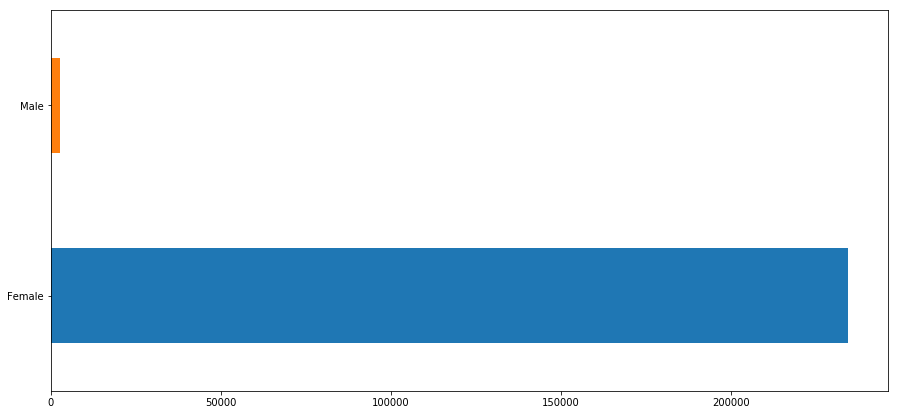

D:\Program Files (x86)\Virtual_Environments\ENV\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Gender,Counts,Percentage
0,Female,234540,0.988469
1,Male,2736,0.0115309


In [7]:
##以橫向柱狀圖顯示使用者性別分布

#計算男、女性人數
gender = member["GenderTypeDef"].value_counts()

#設定圖片大小
plt.figure(figsize=(15, 7))

#橫向長條圖
gender.plot.barh()

#顯示圖片
plt.show()

##計算使用者性別比例
#修改資料標題
gender = gender.to_frame().reset_index().rename(columns= {"index": "Gender", "GenderTypeDef": "Counts"})

#新增欄位
gender["Percentage"] = None

#計算性別比例
gender["Percentage"].iloc[0] = gender["Counts"].iloc[0]/(gender["Counts"].iloc[0]+gender["Counts"].iloc[1])
gender["Percentage"].iloc[1] = gender["Counts"].iloc[1]/(gender["Counts"].iloc[0]+gender["Counts"].iloc[1])

#顯示計算後資料
gender.head()


## 91APP的目標族群為女性，佔所有用戶的 98.8%，男性則佔 1.12%

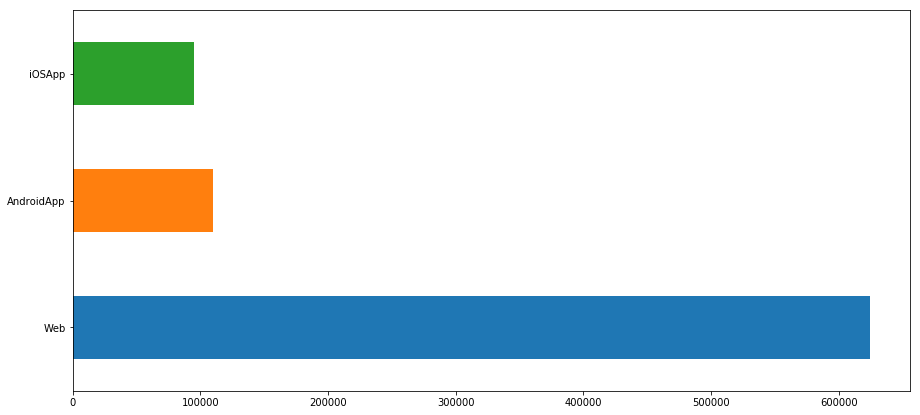

,Platform,Counts,Percentage
0,Web,624375,0.753037
1,AndroidApp,109704,0.13231
2,iOSApp,95064,0.114653


In [8]:
##以橫向柱狀圖顯示使用者使用平台分布
register = member["RegisterSourceTypeDef"].value_counts()
plt.figure(figsize=(15, 7))
register.plot.barh()
plt.show()

##計算使用者使用平台比例
register = register.to_frame().reset_index().rename(columns= {"index": "Platform", "RegisterSourceTypeDef": "Counts"})
register["Percentage"] = None
total_register = register["Counts"].sum()
register["Percentage"].iloc[0] = register["Counts"].iloc[0]/total_register
register["Percentage"].iloc[1] = register["Counts"].iloc[1]/total_register
register["Percentage"].iloc[2] = register["Counts"].iloc[2]/total_register
register.head()


## 91APP多數使用者使用網頁進行消費。行動裝置部分，Android用戶數則稍多餘iOS

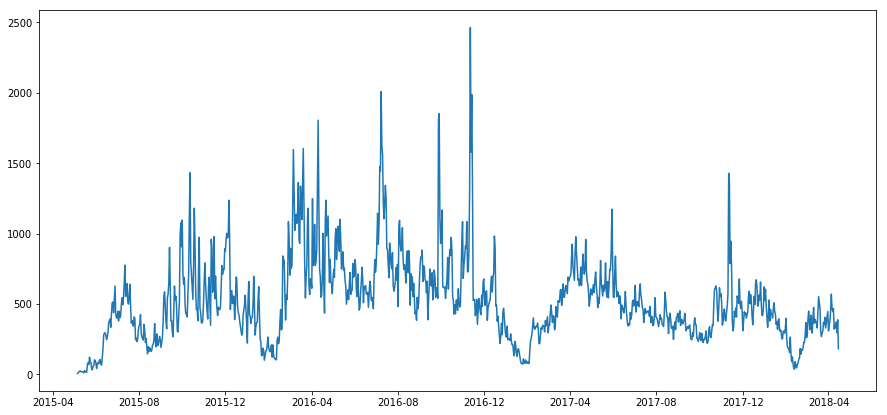

In [9]:
##以折線圖顯示使用者初次消費時間分布
min_order = member["MinOrderDate"].value_counts().to_frame().reset_index().rename(columns= {"index": "Date", "MinOrderDate": "Counts"})

#將 Date 欄位的值轉換為時間單位
min_order["Date"] = pd.to_datetime(min_order["Date"])

#從舊到新排序時間
min_order.sort_values(by=["Date"], inplace=True, ascending=True)

#輸出圖表
min_order.reset_index().drop(columns="index")
plt.figure(figsize=(15,7))
plt.plot(min_order["Date"], min_order["Counts"])


## 每年 6、 7 月和 12 月是新用戶加入 91APP 的高峰期

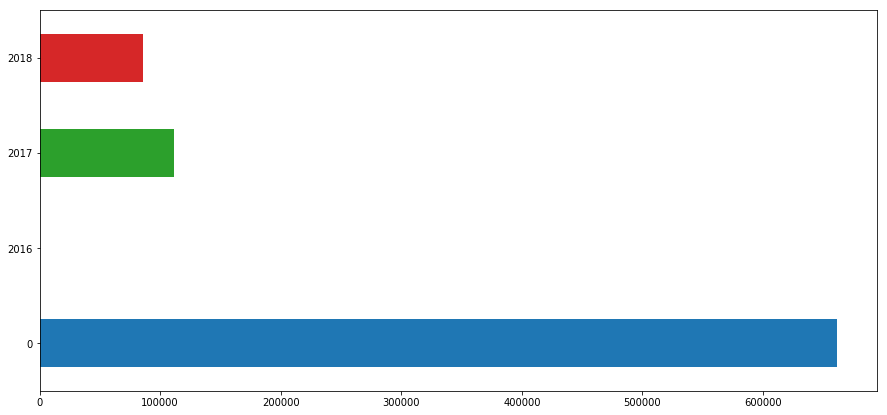

,Year,Counts,Percentage
0,0,661189,0.769589
1,2016,2,2.32789e-06
2,2017,111790,0.130118
3,2018,86165,0.100291


In [10]:
##以橫向柱狀圖顯示使用者領取生日禮的情況
last_birthday = member["LastBirthdayPresentYear"].value_counts()
last_birthday.sort_index(inplace=True, ascending=True)
plt.figure(figsize=(15,7))
last_birthday.plot.barh()
plt.show()

last_birthday = last_birthday.to_frame().reset_index().rename(columns= {"index": "Year", "LastBirthdayPresentYear": "Counts"})
last_birthday["Percentage"] = None
total_last_birthday = last_birthday["Counts"].sum()
last_birthday["Percentage"].iloc[0] = last_birthday["Counts"].iloc[0]/total_last_birthday
last_birthday["Percentage"].iloc[1] = last_birthday["Counts"].iloc[1]/total_last_birthday
last_birthday["Percentage"].iloc[2] = last_birthday["Counts"].iloc[2]/total_last_birthday
last_birthday["Percentage"].iloc[3] = last_birthday["Counts"].iloc[3]/total_last_birthday
last_birthday.head()

## 使用者領取生日禮的狀況不算踴躍，可以是91APP未來行銷活動的重點方向